In [1]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

In [2]:
#Config window, so set all your configurations here
# N_Steps_In je input rolling window, N_Steps_Out je output rolling window (tj forecast period, ali continuos)
# Treba paziti ovdje za data leaking, i double forecasting da se ne desi
n_steps_in, n_steps_out = 5, 2

#Training, validation and testing

In [3]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [17]:
#Full data loading and preprocessing

# load dataset
dataset = read_csv('CSV Files with Calculated Indicators/NYSE.csv', header=0, index_col=None)

# Convert Date column to date, but in this case Date is index column
dataset['Date'] = pd.to_datetime(dataset['Date'], origin='1900-01-01', unit='D')

timestamps = dataset['Date']
dataset = dataset.drop('Date', axis=1)

ct_values = dataset['CT']
dataset = dataset.drop('CT', axis=1)

for column in tqdm(dataset.columns):
    




def differentiate_column(column):
    return column.diff().fillna(0)  # Using .diff() for differencing and filling NaNs with 0

print('Differentiating')
for column in tqdm(dataset.columns):
    dataset[column] = differentiate_column(dataset[column])





print('ADF Testing')
for column in tqdm(dataset.columns):
    x = adfuller(dataset[column])
    adf_results[column] = x[1]  # Store the p-value in the dictionary

non_stat_list = [column for column, p_value in adf_results.items() if p_value > 0.05]

print("Non-stationary columns:")
print(non_stat_list)
print("Number of non-stationary columns:", len(non_stat_list))

# If you want to print the ADF test results for each column
print("\nADF Test Results:")
for column, p_value in adf_results.items():
    print(f"{column}: {p_value}")



# adf_results = {}  # Initialize an empty dictionary to store ADF test results


# def adf_test_values(column):
#     result_before_diff = adfuller(column)
    
#     # Check if differencing is necessary
#     if result_before_diff[1] > 0.05:
#         column_diff = column.diff().fillna(0)
#         result_after_diff = adfuller(column_diff)
#         return {
#             'before_diff': result_before_diff[1],
#             'after_diff': result_after_diff[1],
#         }
#     else:
#         # If already stationary, no differencing is applied
#         return {
#             'before_diff': result_before_diff[1],
#             'after_diff': None,
#         }

# adf_results = {}  # Dictionary to store ADF test values

# # Iterate through columns and store ADF test values
# for column in tqdm(dataset.columns):
#     adf_results[column] = adf_test_values(dataset[column])

# print(adf_results)


# Now, adf_results contains ADF test values and differentiated columns only if necessary








# #Exported values
# values = dataset.values

# print(dataset)


# #CT column is a class, not a continous variable, so we get the index, and do some magic with it idk
# ct_index = dataset.columns.get_loc("CT")

# # integer encode direction
# encoder = LabelEncoder()
# values[:,ct_index] = encoder.fit_transform(values[:,ct_index])




ADF Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:20<00:00,  3.05it/s]

Non-stationary columns:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'SMAAC_7', 'SMAAC_12', 'SMAAC_21', 'SMAAC_26', 'SMAAC_50', 'SMAAC_100', 'SMAAC_200', 'EMAAC_7', 'EMAAC_12', 'EMAAC_21', 'EMAAC_26', 'EMAAC_50', 'EMAAC_100', 'EMAAC_200', 'PSAR', 'LBB_20', 'UBB_20', 'OBV', 'ACCDIST', 'CMF']
Number of non-stationary columns: 25

ADF Test Results:
Open: 0.9215331431248989
High: 0.9100708067619865
Low: 0.9109447994602144
Close: 0.9007823807526556
Adj Close: 0.9007823807526556
Volume: 0.014931137307776059
SMAAC_7: 0.917009194572609
SMAAC_12: 0.9191853734486903
SMAAC_21: 0.9054189559924261
SMAAC_26: 0.8834047446288951
SMAAC_50: 0.9163233742496799
SMAAC_100: 0.7955499924623594
SMAAC_200: 0.833547079332531
EMAAC_7: 0.915971212272565
EMAAC_12: 0.9185951380451245
EMAAC_21: 0.9208884442261818
EMAAC_26: 0.921944842359221
EMAAC_50: 0.9249013565578904
EMAAC_100: 0.9255741484989349
EMAAC_200: 0.9325367728006588
MACD: 3.036627818152097e-22
TR: 5.76350202431702e-12
SMATR_14: 7.99113798753152e-07
SATR

In [ ]:
# load dataset
dataset = read_csv('CSV Files with Calculated Indicators/NYSE.csv', header=0, index_col=None)

# Shifted target kolona
dataset['Adj Close_Shifted'] = dataset['Adj Close'].shift(periods=-n_steps_out)

dataset = dataset.iloc[:-n_steps_out]



# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

X, y = split_sequences(scaled, n_steps_in, n_steps_out)
n_features = X.shape[2] #Broj kolona
print('This is X[0]')
print(X[0])
print('This is y[0]') #Y je set odgovora, svaki row je zapravo serija odgovora.
print(y[0])
print(n_features)

NameError: name 'scaled' is not defined

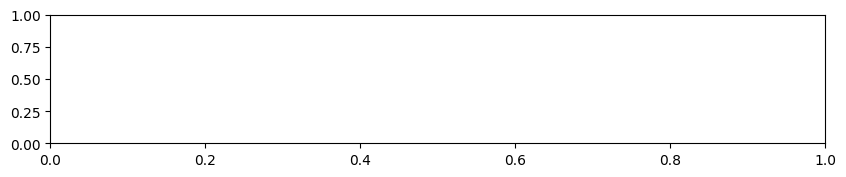

In [6]:
# Ovo je basic plotting
# Automatically determine the number of columns
num_columns = dataset.shape[1]  # This gets the number of columns in the DataFrame

pyplot.figure(figsize=(10, num_columns*2))  # Adjust the figure size as needed

# Plot each column
for i in range(num_columns):
    pyplot.subplot(num_columns, 1, i+1)  # Subplots are indexed from 1
    pyplot.plot(scaled[:, i])
    pyplot.title(dataset.columns[i], y=0.5, loc='right')

pyplot.tight_layout()  # Optional: Improves the layout
pyplot.show()

In [ ]:
#My model code



# Model Code 1
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

# Model Code 2
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
# Nemoj zaboraviti da jedan row je jedan step, a kolona je jedan feature
x_input = array([[70, 75], 
                 [80, 85], 
                 [90, 95],
                 [100, 105],
                 [105, 110],])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)